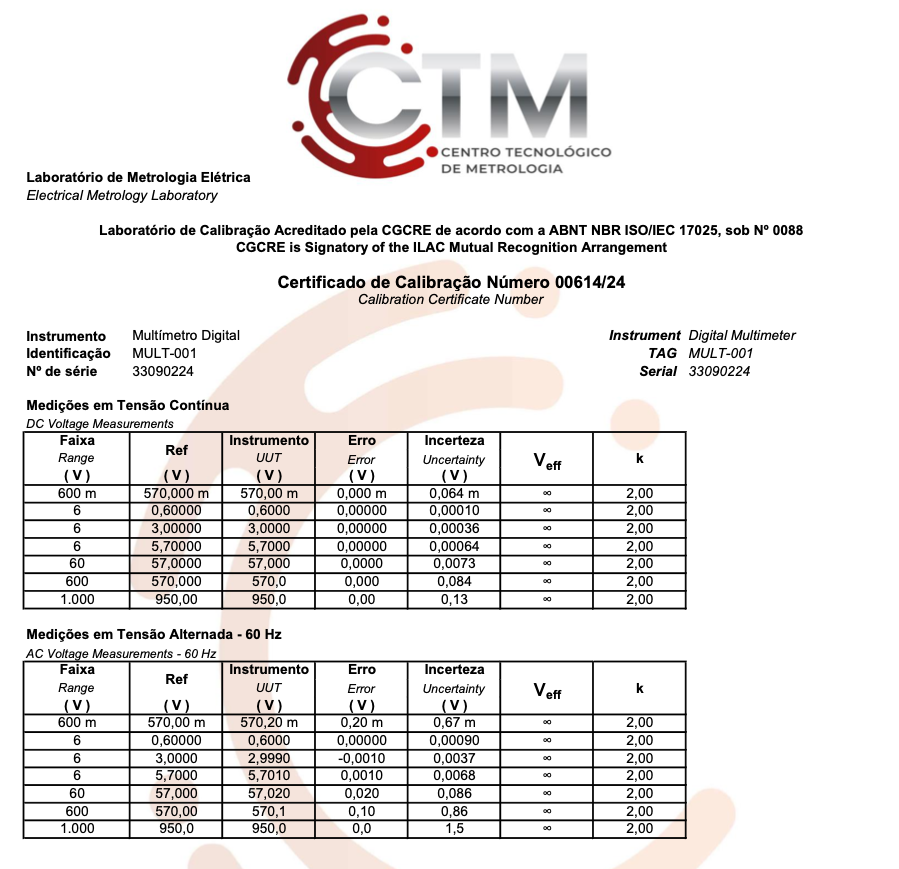

In [28]:
from PIL import Image
from ultralyticsplus import YOLO, render_result
import os

# Caminho para a imagem
image_path = "/home/aluno-pbarroso/pytorch-pbarroso/ft_tatr/Certificados/Out/ctm.png"
img = Image.open(image_path)
img

In [29]:
# Função para criar o arquivo XML no formato Pascal VOC
def create_voc_xml(img_path, box, output_dir, imgout):
    # Nome da imagem e diretório
    img_filename = os.path.basename(img_path)
    img_folder = os.path.basename(os.path.dirname(img_path))
    
    # Criar a estrutura XML
    annotation = ET.Element("annotation")
    
    ET.SubElement(annotation, "folder").text = img_folder
    ET.SubElement(annotation, "filename").text = os.path.basename(imgout)
    ET.SubElement(annotation, "path").text = imgout
    
    # Adicionar tamanho da imagem (você pode substituir por valores reais)
    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(640)  # Substitua pelo valor real
    ET.SubElement(size, "height").text = str(480)  # Substitua pelo valor real
    ET.SubElement(size, "depth").text = str(3)  # 3 para RGB

    # Adicionar objetos detectados (tabelas)
    obj = ET.SubElement(annotation, "object")
    ET.SubElement(obj, "name").text = "table"
    ET.SubElement(obj, "pose").text = "Frontal"
    ET.SubElement(obj, "truncated").text = "0"
    ET.SubElement(obj, "difficult").text = "0"

    bndbox = ET.SubElement(obj, "bndbox")
    ET.SubElement(bndbox, "xmin").text = str(int(box[0]))
    ET.SubElement(bndbox, "ymin").text = str(int(box[1]))
    ET.SubElement(bndbox, "xmax").text = str(int(box[2]))
    ET.SubElement(bndbox, "ymax").text = str(int(box[3]))

    # Salvar o arquivo XML
    #tree = ET.ElementTree(annotation)
    #xml_filename = os.path.join(output_dir, os.path.basename(imgout).replace('.png', '.xml'))
    #tree.write(xml_filename)
    #print(f"Arquivo XML gerado: {xml_filename}")

    # Converter para string e formatar o XML com indentação
    rough_string = ET.tostring(annotation, 'utf-8')
    reparsed = minidom.parseString(rough_string)
    formatted_xml = reparsed.toprettyxml(indent="  ")

    # Salvar o arquivo XML
    xml_filename = os.path.join(output_dir, os.path.basename(imgout).replace('.png', '.xml'))
    with open(xml_filename, "w") as f:
        f.write(formatted_xml)


0: 128x640 1 item, 9.7ms
Speed: 1.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 128, 640)
boxes  [[12.47076416015625, 22.910625457763672, 1560.0, 294.0]]


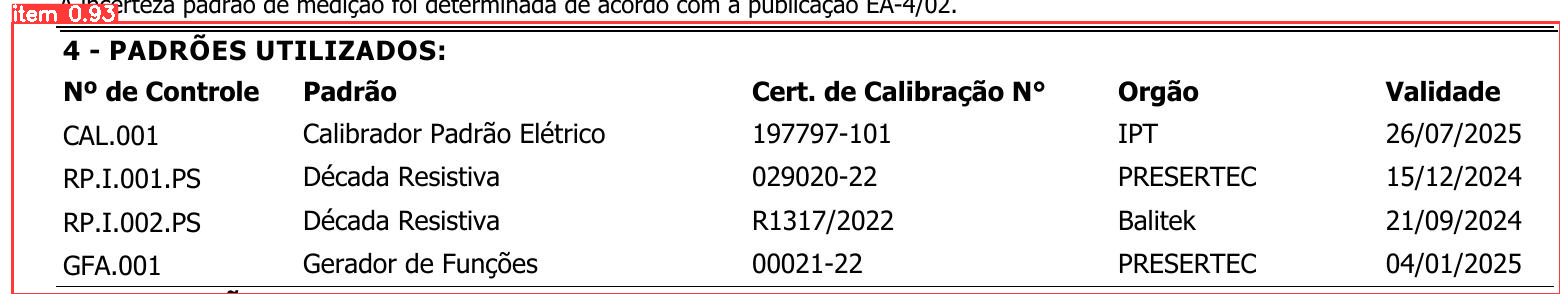

In [43]:
import os
import cv2
import xml.etree.ElementTree as ET
import xml.dom.minidom as minidom
from ultralytics import YOLO
from ultralyticsplus import render_result
from PIL import Image

'''
LAB_11_005 - esse
LAB_12_047 - esse
LAB_11_010
LAB_10_083 - esse
LAB_09_179 - esse
LAB_09_048
LAB_08_020
LAB_07_134 - esse
LAB_07_078
LAB_06_098
LAB_05_036 - esse
LAB_04_012
LAB_03_119 - ESSE!
LAB_03_111
LAB_02_070

'''

#CAMINHO BASE DA IMAGEM (MUDAR AQUI - PONTO 1)
base_path = "/home/aluno-pbarroso/pytorch-pbarroso/DATASET/ALL_IMG"
img_name = "LAB_02_070.jpg"

image_path = f"{base_path}/{img_name}"

YOLO_FODUUCOM = '/home/aluno-pbarroso/yolo_foduucom.pt'
YOLO_BEST_CHECKPOINT = '/home/aluno-pbarroso/pytorch-pbarroso/FT_YOLO_LORA/CV_YOLO11/results/YOLO-CEN03_trial_11_fold0/weights/best.pt'

#CAMINHO DO MODELO (MUDAR AQUI - PONTO 2)
model_to_apply = YOLO_BEST_CHECKPOINT

# Carregar o modelo YOLO
model_detect = YOLO(model_to_apply)
#model = YOLO("yolov8n.pt")

img = cv2.imread(image_path)

# Realizar a detecção de objetos
#results = model_detect(img, save=True, save_txt=True, save_conf=True)
results = model_detect(img)

# Caminho para salvar as saídas
#output_dir = "/home/aluno-pbarroso/pytorch-pbarroso/ft_tatr/Certificados/Out/YOLO/"
output_dir = "/home/aluno-pbarroso/pytorch-pbarroso/FT_YOLO_TRAIN/predict"

#NOME DO ALIAS PARA GERAR IMAGEM
alias = model_to_apply.split("/")
alias = alias[len(alias) - 1].split(".")
alias = alias[0]

i = 0
for result in results:

  #imgout = "/home/aluno-pbarroso/pytorch-pbarroso/ft_tatr/Certificados/Out/YOLO/ctm_001.png"
  imgout = f"{output_dir}]/{image_path}_{i}.jpg"
  #result.save(filename=imgout)
  i +=1
  # Obter a imagem com as detecções desenhadas
  img_with_detections = result.plot()  # Este método retorna uma imagem com as detecções

  # Salvar a imagem resultante com as marcações
  cv2.imwrite(imgout, img_with_detections)
  
  boxes = result.boxes.xyxy.tolist()
  print("boxes ", boxes)
  
  #i = 0
  #for box in boxes:
    # Criar o arquivo XML no formato Pascal VOC
  #  png_out = f"/home/aluno-pbarroso/pytorch-pbarroso/ft_tatr/Certificados/Out/YOLO/ctm_001_{i}.png"
  #  create_voc_xml(image_path, box, output_dir, png_out)
  #  i +=1

render = render_result(model=model_detect, image=img, result=results[0])
render

In [2]:
from ultralytics import YOLO
import cv2

# Carregar um modelo YOLOv8 pré-treinado
model = YOLO("yolov8n.pt")

# Carregar a imagem
imgpath = "/home/aluno-pbarroso/pytorch-pbarroso/ft_tatr/Certificados/Out/LAB_04_3C/jpg/LAB_04_001.jpg"
image = I(imgpath)

if image is None:
    print("Erro: A imagem não foi carregada corretamente!")

# Realizar a detecção de objetos na imagem
results = model(image)

# Iterar sobre cada resultado
for result in results:
    # Converter as coordenadas das caixas delimitadoras para uma lista
    boxes = result.boxes.xyxy.tolist()
    print("boxes ", boxes)

    # Desenhar cada caixa delimitadora na imagem
    for box in boxes:
        x1, y1, x2, y2 = map(int, box[:4])  # Extrair coordenadas e converter para inteiros
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Desenhar retângulo verde

# Mostrar a imagem com as caixas desenhadas
#cv2.imshow('Tabela Detectada', image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Salvar a imagem com as caixas desenhadas (opcional)
cv2.imwrite('/home/aluno-pbarroso/pytorch-pbarroso/ft_tatr/Certificados/Out/LAB_04_3C/jpg/detected_table_contours.jpg', image)



0: 224x640 (no detections), 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 640)
boxes  []


True

In [ ]:


# load model
model = YOLO('foduucom/table-detection-and-extraction')

imgpath = "/home/aluno-pbarroso/pytorch-pbarroso/ft_tatr/Certificados/Out/LAB_01_CTM/jpg/LAB01_001.jpg"
results = model.predict(imgpath)

print('Boxes: ', results[0].boxes)
render = render_result(model=model, image=img, result=results[0])
render

: 